In [13]:
import pandas as pd

In [18]:
data = pd.read_csv('..\data\processed_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\angel\AppData\Local\Temp\ipykernel_41588\816765328.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\processed_data.csv')


In [19]:
data.head()

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,0,1,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,0,126,83
1,1,2,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0,125,80
2,2,3,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0,125,80
3,3,4,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1,140,90
4,4,5,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1,140,90


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

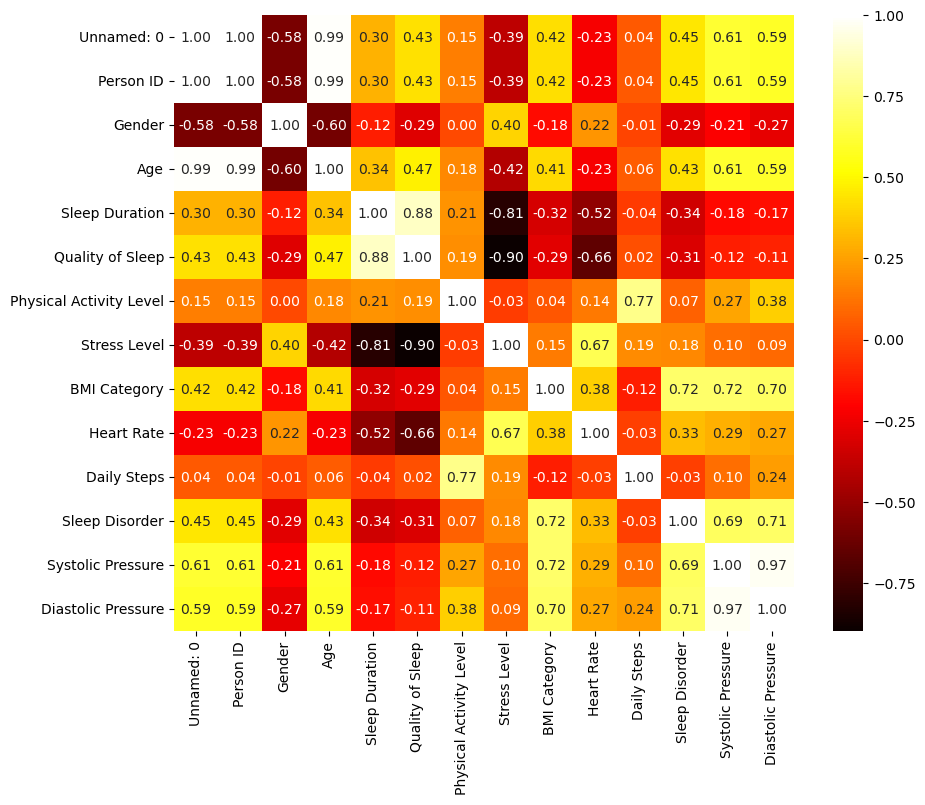

In [27]:
matriz_correlacion = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) 
sns.heatmap(matriz_correlacion, annot=True, cmap='hot', fmt=".2f")

In [32]:
dtoff = data.drop(columns=['Person ID', 'Daily Steps', 'Physical Activity Level', 'Unnamed: 0'])
dtoff.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,27,Software Engineer,6.1,6,6,2,126/83,77,0,126,83
1,1,28,Doctor,6.2,6,8,1,125/80,75,0,125,80
2,1,28,Doctor,6.2,6,8,1,125/80,75,0,125,80
3,1,28,Sales Representative,5.9,4,8,3,140/90,85,1,140,90
4,1,28,Sales Representative,5.9,4,8,3,140/90,85,1,140,90


<Axes: >

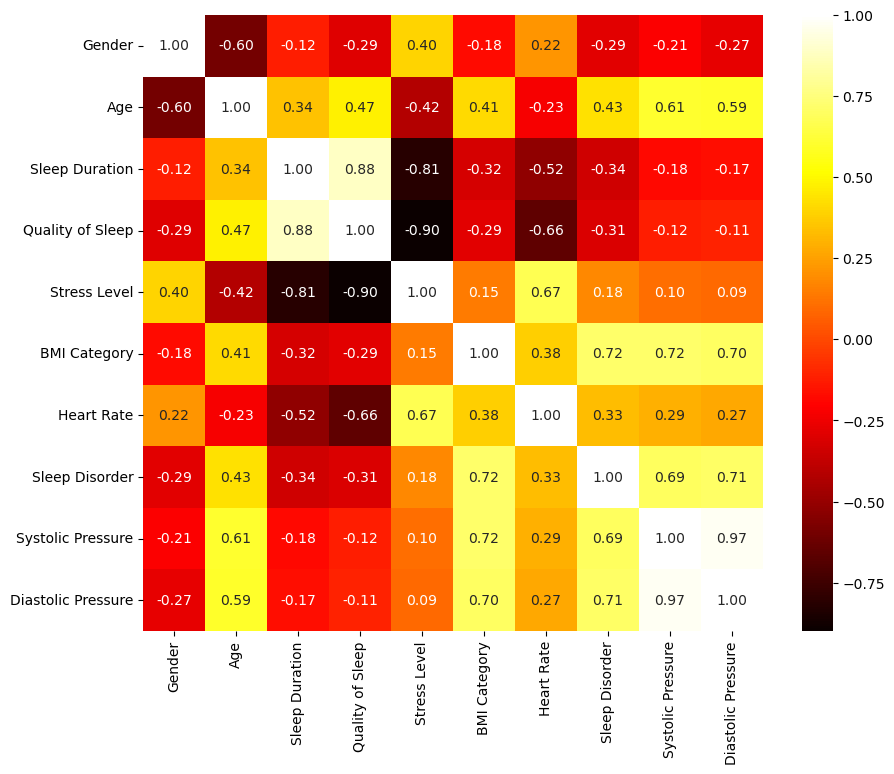

In [33]:
mapoff = dtoff.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) 
sns.heatmap(mapoff, annot=True, cmap='hot', fmt=".2f")

In [34]:
dtoff.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic Pressure,Diastolic Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,5.385027,1.393048,70.165775,0.414439,128.553476,84.649733
std,0.500641,8.673133,0.795657,1.196956,1.774526,0.636727,4.135676,0.493285,7.748118,6.161611
min,0.000000,27.000000,5.800000,4.000000,3.000000,0.000000,65.000000,0.000000,115.000000,75.000000
25%,0.000000,35.250000,6.400000,6.000000,4.000000,1.000000,68.000000,0.000000,125.000000,80.000000
50%,1.000000,43.000000,7.200000,7.000000,5.000000,1.000000,70.000000,0.000000,130.000000,85.000000
75%,1.000000,50.000000,7.800000,8.000000,7.000000,2.000000,72.000000,1.000000,135.000000,90.000000
max,1.000000,59.000000,8.500000,9.000000,8.000000,3.000000,86.000000,1.000000,142.000000,95.000000


In [37]:
from sklearn.cluster import KMeans

In [53]:
X = dtoff[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',	'BMI Category',	'Heart Rate',	'Sleep Disorder', 'Systolic Pressure',	'Diastolic Pressure']]


k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

kmeans.fit(X)
print(kmeans.score(X, dtoff['Quality of Sleep']))

etiquetas_cluster = kmeans.labels_
centroides = kmeans.cluster_centers_

dtoff['cluster'] = etiquetas_cluster

print("Etiquetas de clúster para cada fila:")

print("\nCentroides de los clústeres:")
print(centroides)

-3977.4187966862437
Etiquetas de clúster para cada fila:

Centroides de los clústeres:
[[ 9.09090909e-01  3.23030303e+01  6.11212121e+00  5.93939394e+00
   7.69696970e+00  1.18181818e+00  7.28484848e+01  9.09090909e-02
   1.25484848e+02  8.07272727e+01]
 [-1.11022302e-16  4.43703704e+01  6.59629630e+00  7.00000000e+00
   4.14814815e+00  2.00000000e+00  6.50000000e+01  9.25925926e-01
   1.35000000e+02  9.00000000e+01]
 [ 9.84375000e-01  4.03281250e+01  7.48125000e+00  7.92187500e+00
   5.03125000e+00  1.06250000e+00  6.92656250e+01  9.37500000e-02
   1.29625000e+02  8.47968750e+01]
 [ 1.11111111e-01  4.96111111e+01  6.24722222e+00  6.22222222e+00
   7.55555556e+00  2.11111111e+00  7.60555556e+01  9.44444444e-01
   1.40055556e+02  9.46111111e+01]
 [-2.22044605e-16  5.29142857e+01  8.37428571e+00  8.94285714e+00
   3.08571429e+00  9.14285714e-01  6.52000000e+01  2.85714286e-02
   1.24600000e+02  7.97714286e+01]
 [ 9.62264151e-01  3.14716981e+01  7.46415094e+00  7.16981132e+00
   5.6981132

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

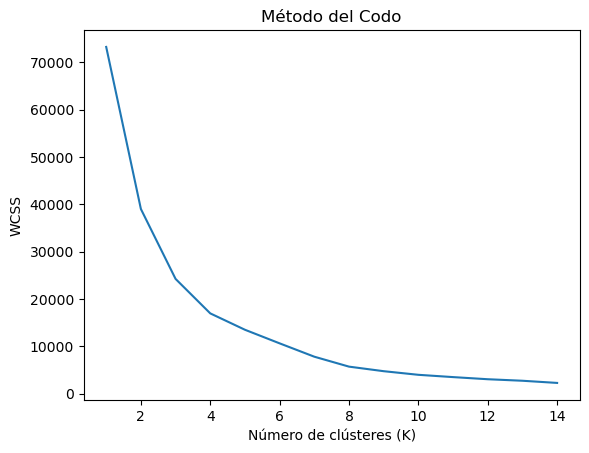

In [48]:
wcss = []
for i in range(1, 15): # Probar K desde 1 hasta 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X) # X es tu conjunto de datos
    wcss.append(kmeans.inertia_) # Guarda el valor de la inercia (WCSS)

plt.plot(range(1, 15), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('WCSS')
plt.show()

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Seleccionar solo columnas numéricas
df_numerico = dtoff.select_dtypes(include=[np.number])

print(f"\n=== DATOS NUMÉRICOS PARA PCA ===")
print(f"Dimensiones: {df_numerico.shape}")
print(f"Columnas numéricas: {list(df_numerico.columns)}")

# Estandarizar los datos (CRUCIAL para PCA)
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(df_numerico)

print("Datos estandarizados - forma:", datos_estandarizados.shape)


=== DATOS NUMÉRICOS PARA PCA ===
Dimensiones: (374, 11)
Columnas numéricas: ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder', 'Systolic Pressure', 'Diastolic Pressure', 'cluster']
Datos estandarizados - forma: (374, 11)
